In [1]:
import os
os.getcwd()

'C:\\Users\\gopal\\Desktop\\Machine Learning\\vehicle_loan'

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('train.csv')
pd.set_option('display.max_columns',45)
dataset.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [5]:
dataset[['Date.of.Birth','DisbursalDate']] = dataset[['Date.of.Birth','DisbursalDate']].astype('datetime64[ns]')

In [6]:
dataset.isnull().sum(axis=0)

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [7]:
dataset['Employment.Type'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [8]:
dataset['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [9]:
dataset['Employment.Type'].fillna('Unknown',axis=0,inplace=True)

In [10]:
#dataset.isnull().sum(axis=0)

In [11]:
dataset['Employment.Type'].unique()

array(['Salaried', 'Self employed', 'Unknown'], dtype=object)

In [12]:
percentage=[]
j=0
for i in dataset['Employment.Type'].unique():
    percentage.append(dataset[dataset['Employment.Type']==i]['loan_default'].value_counts()[1]/dataset[dataset['Employment.Type']==i]['loan_default'].value_counts().sum())
    print(i , percentage[j])
    j+=1

Salaried 0.20345807190010015
Self employed 0.22765699063736436
Unknown 0.2145933951181308


In [13]:
dataset['Employment.Type'] = dataset['Employment.Type'].replace(('Salaried','Self employed','Unknown'),(2,0,1))

In [14]:
dataset['Employment.Type'].value_counts()

0    127635
2     97858
1      7661
Name: Employment.Type, dtype: int64

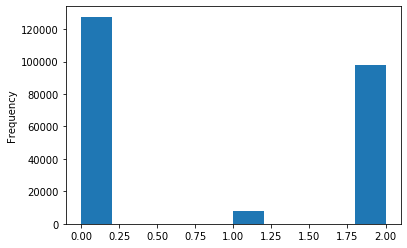

In [15]:
dataset['Employment.Type'].plot(kind='hist')

In [16]:
percentage=[]
j=0
for i in dataset['manufacturer_id'].unique():
    if(dataset[dataset['manufacturer_id']==i]['loan_default'].value_counts().size==1):
        print(i,0)
    else:
        percentage.append(dataset[dataset['manufacturer_id']==i]['loan_default'].value_counts()[1]/dataset[dataset['manufacturer_id']==i]['loan_default'].value_counts().sum())
        print(i , percentage[j])
        j+=1

45 0.22849927595097658
86 0.2045940073401866
48 0.2725314183123878
51 0.2079473606822526
120 0.22074963760612965
49 0.2187866927592955
145 0.20051413881748073
67 0.21746361746361748
153 0.3333333333333333
156 0
152 0


In [17]:
dataset['manufacturer_id'] = dataset['manufacturer_id'].replace((45,  86,  48,  51, 120,  49, 145,  67, 153, 156, 152),(2,7,1,6,3,4,8,5,0,9,10))

In [18]:
dataset['manufacturer_id'].value_counts()

7     109534
2      56626
6      27204
1      16710
4      10220
3       9658
5       2405
8        778
0         12
10         6
9          1
Name: manufacturer_id, dtype: int64

In [19]:
dataset.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,2,1441,1984-01-01,2,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,2,1502,1985-07-31,0,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,2,1497,1985-08-24,0,2018-01-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,2,1501,1993-12-30,0,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,2,1495,1977-09-12,0,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [20]:
dataset.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
UniqueID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021302,0.030500,-0.026436,-0.057734,0.075983,NaN,-0.001372,-0.014291,0.008201,-0.026072,-0.001382,-0.014016,-0.013584,-0.020862,-0.007915,-0.007259,-0.002910,-0.002563,-0.044180,-0.039888,-0.027486,-0.013428,-0.017114,-0.016857,-0.009321,-0.013518,-0.003842,-0.009186,0.016537,0.033848
disbursed_amount,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.068946,0.068540,0.020687,-0.023956,0.010120,NaN,-0.015589,0.014490,0.011665,0.001381,0.008291,0.011409,0.034461,0.039542,0.019422,0.015713,0.006294,0.006412,-0.014916,-0.014275,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.038513,0.077675
asset_cost,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.019639,0.275878,-0.054541,-0.026348,0.008711,NaN,-0.093716,0.048075,0.083899,0.020484,0.005542,-0.047398,-0.026798,-0.021692,-0.014782,-0.004356,-0.001180,-0.001221,-0.022600,-0.020359,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.017301,0.014261
ltv,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.108793,-0.300112,0.104817,0.004882,0.004940,NaN,0.106953,-0.037786,-0.098393,-0.024060,0.004467,0.084993,0.086571,0.087929,0.051770,0.026714,0.009955,0.010177,0.013019,0.010565,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.085725,0.098208
branch_id,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.039275,0.048192,0.018249,0.187782,0.088764,NaN,-0.036384,0.030206,0.021387,-0.015503,-0.008537,-0.018049,-0.010384,-0.006403,-0.005546,-0.004133,-0.003370,-0.003412,-0.003194,-0.001957,-0.007104,0.001418,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,-0.001813,0.030193
supplier_id,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.037203,0.187401,-0.087286,0.105502,0.095792,NaN,-0.081161,0.036804,0.079355,-0.015682,-0.008773,-0.077029,-0.070536,-0.066930,-0.042692,-0.022582,-0.012959,-0.012950,-0.025809,-0.019885,-0.015665,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.030988,0.027357
manufacturer_id,-0.021302,0.068946,-0.019639,0.108793,-0.039275,-0.037203,1.000000,-0.089667,0.027714,0.006964,-0.049446,NaN,0.064418,-0.020013,-0.064315,-0.000075,0.008153,0.068005,0.058384,0.056649,0.020412,0.029571,0.016340,0.016305,0.014850,0.011061,0.010313,0.005366,0.006778,0.006769,0.009774,0.003185,0.040998,0.017400,0.005038,-0.038687
Current_pincode_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.089667,1.000000,-0.201759,0.047903,-0.042609,NaN,-0.309285,0.041118,0.281934,0.039667,-0.008913,-0.161664,-0.084687,-0.117882,-0.062177,-0.055948,-0.025843,-0.025697,-0.051766,-0.049852,-0.036228,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.058821,0.028419
Employment.Type,-0.026436,0.020687,-0.054541,0.104817,0.018249,-0.087286,0.027714,-0.201759,1.000000,0.049342,-0.039101,NaN,0.087490,-0.003887,-0.088934,-0.002888,0.005093,0.042825,-0.006753,0.007440,-0.023544,-0.020862,-0.012434,-0.012681,0.003847,0.004494,-0.000012,0.001297,0.001728,0.001756,-0.012915,0.005345,0.008657,-0.007658,-0.002220,-0.028629
State_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.006964,0.047903,0.049342,1.000000,0.117309,NaN,-0.169882,0.113939,0.151839,0.027886,-0.000915,-0.042323,-0.008704,-0.021061,-0.012381,-0.006359,-0.004304,-0.004129,0.031245,0.032142,0.015679,0.01

In [21]:
lst={}
for i in dataset['branch_id'].unique():
    lst[i]=(dataset[dataset['branch_id']==i]['loan_default']==1).sum()
lst=pd.DataFrame([(k,v) for k,v in lst.items()],columns=['branch_id','Total_loan_default'])

In [22]:
#list1 = [(k,v) for k,v in lst.items()]

In [23]:
lst.sort_values(by=['Total_loan_default'],ascending=False,inplace=True)

In [24]:
dataset['branch_id'] = dataset['branch_id'].replace(tuple(lst['branch_id'].to_list()),range(82))

In [25]:
dataset['branch_id'].value_counts()

1     13138
2     11328
6      9230
3      9218
0      8832
      ...  
77      183
78      176
79      156
80       89
81       69
Name: branch_id, Length: 82, dtype: int64

In [26]:
dataset.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,2,22807,2,1441,1984-01-01,2,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,2,22807,2,1502,1985-07-31,0,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,2,22807,2,1497,1985-08-24,0,2018-01-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,2,22807,2,1501,1993-12-30,0,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,2,22807,2,1495,1977-09-12,0,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [27]:
len(dataset['supplier_id'].unique())

2953

In [28]:
lst2={}
for i in dataset['supplier_id'].unique():
    lst2[i]=(dataset[dataset['supplier_id']==i]['loan_default']==1).sum()
lst2=pd.DataFrame([(k,v) for k,v in lst2.items()],columns=['supplier_id','Total_loan_default'])

In [29]:
lst2.sort_values(by=['Total_loan_default'],ascending=False,inplace=True)

In [30]:
dataset['supplier_id'] = dataset['supplier_id'].replace(tuple(lst2['supplier_id'].to_list()),range(2953))

In [31]:
dataset.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,2,678,2,1441,1984-01-01,2,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,2,678,2,1502,1985-07-31,0,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,2,678,2,1497,1985-08-24,0,2018-01-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,2,678,2,1501,1993-12-30,0,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,2,678,2,1495,1977-09-12,0,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [32]:
len(dataset['Current_pincode_ID'].unique())

6698

In [33]:
pd.crosstab(dataset['PERFORM_CNS.SCORE'],dataset['PERFORM_CNS.SCORE.DESCRIPTION'])

PERFORM_CNS.SCORE.DESCRIPTION,A-Very Low Risk,B-Very Low Risk,C-Very Low Risk,D-Very Low Risk,E-Low Risk,F-Low Risk,G-Low Risk,H-Medium Risk,I-Medium Risk,J-High Risk,K-High Risk,L-Very High Risk,M-Very High Risk,No Bureau History Available,Not Scored: More than 50 active Accounts found,Not Scored: No Activity seen on the customer (Inactive),Not Scored: No Updates available in last 36 months,Not Scored: Not Enough Info available on the customer,Not Scored: Only a Guarantor,Not Scored: Sufficient History Not Available
PERFORM_CNS.SCORE,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,116950,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,976,0
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3765
16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2885,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
878,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
879,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
lst4 = dataset['PERFORM_CNS.SCORE.DESCRIPTION'].unique()
lst5 = lst4[[0,4,13,14,15,18,19]]

In [35]:
dataset['PERFORM_CNS.SCORE.DESCRIPTION'] = dataset['PERFORM_CNS.SCORE.DESCRIPTION'].replace(tuple(lst5),0)

In [36]:
lst4

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [37]:
dataset['PERFORM_CNS.SCORE.DESCRIPTION'] = dataset['PERFORM_CNS.SCORE.DESCRIPTION'].replace(('M-Very High Risk','L-Very High Risk','K-High Risk','J-High Risk','I-Medium Risk','H-Medium Risk','G-Low Risk','F-Low Risk','E-Low Risk','D-Very Low Risk','C-Very Low Risk','B-Very Low Risk','A-Very Low Risk'),(1,2,3,4,5,6,7,8,9,10,11,12,13))

In [38]:
dataset['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array([ 0,  5,  2, 13, 10,  1, 12, 11,  9,  6,  8,  3,  7,  4],
      dtype=int64)

In [39]:
lst5 =['MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag','Employee_code_ID','State_ID']
for i in lst5:
    print(dataset[i].value_counts())

1    233154
Name: MobileNo_Avl_Flag, dtype: int64
1    195924
0     37230
Name: Aadhar_flag, dtype: int64
0    215533
1     17621
Name: PAN_flag, dtype: int64
0    199360
1     33794
Name: VoterID_flag, dtype: int64
0    227735
1      5419
Name: Driving_flag, dtype: int64
0    232658
1       496
Name: Passport_flag, dtype: int64
2546    628
620     502
255     494
130     408
2153    401
       ... 
241       1
3330      1
3793      1
3779      1
3746      1
Name: Employee_code_ID, Length: 3270, dtype: int64
4     44870
3     34078
6     33505
13    17884
9     16022
8     14197
5     10177
14     9414
1      8936
7      6786
11     6721
18     5412
15     5049
12     4210
2      4160
17     3991
10     3605
16     2685
19     1035
20      185
21      156
22       76
Name: State_ID, dtype: int64


In [40]:
from datetime import datetime
dataset['Age_of_cust']=(dataset['DisbursalDate'].apply(lambda x: x.year))-(dataset['Date.of.Birth'].apply(lambda x: x.year))

In [41]:
(dataset['Age_of_cust']<0).sum()       #wrong information : outliers available

23013

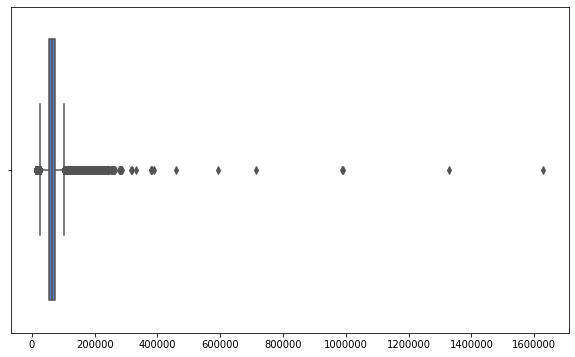

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(['disbursed_amount','asset_cost'],data=dataset,hue='loan_default',palette='muted')

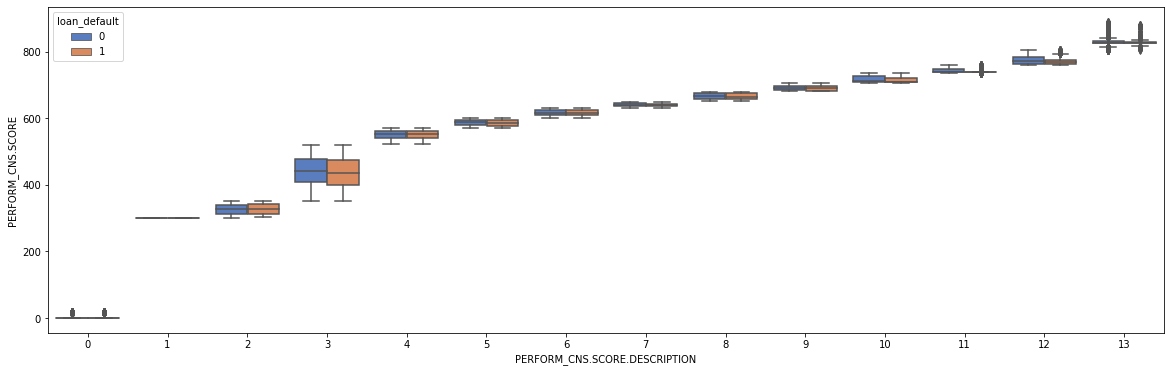

In [43]:
plt.figure(figsize=(20,6))
sns.boxplot(x='PERFORM_CNS.SCORE.DESCRIPTION',y='PERFORM_CNS.SCORE',data=dataset,hue='loan_default',palette='muted')

In [44]:
dataset.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Age_of_cust'],
      dtype='object')

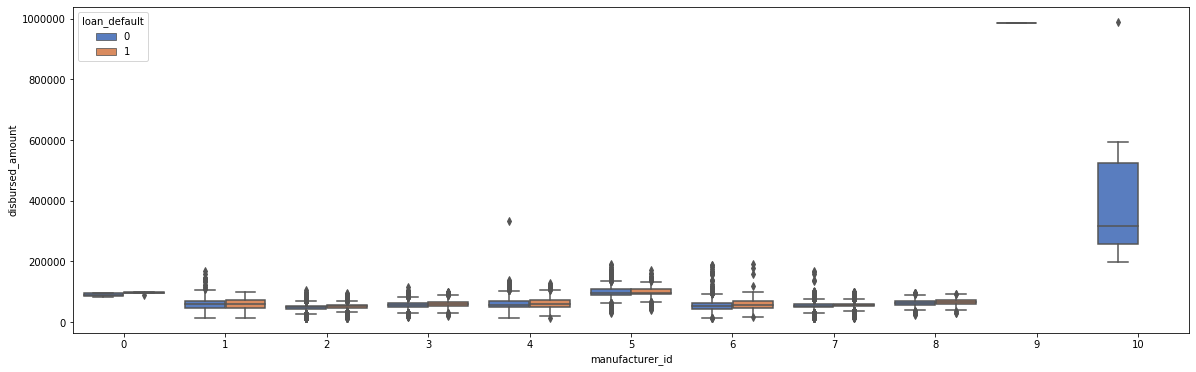

In [45]:
plt.figure(figsize=(20,6))
sns.boxplot(x='manufacturer_id',y='disbursed_amount',data=dataset,hue='loan_default',palette='muted')

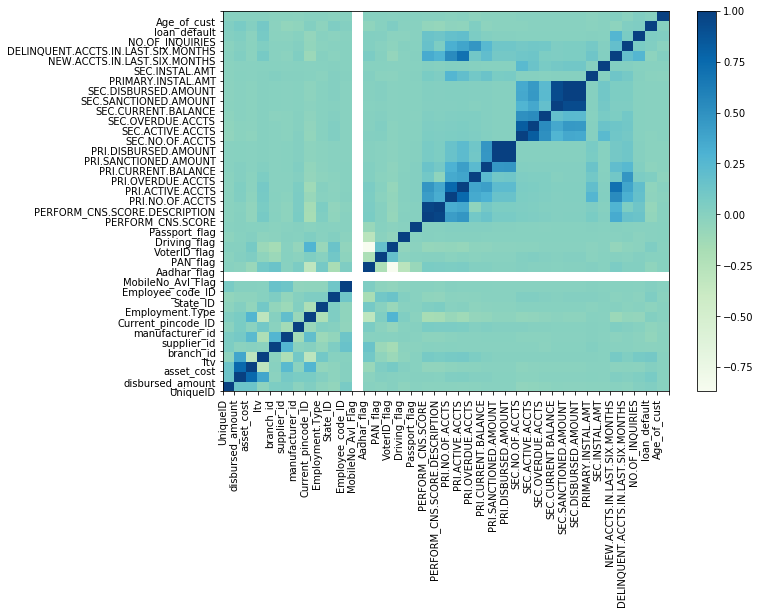

In [46]:
plt.figure(figsize = (10,7))
#colormap=plt.cm.coolwarm
plt.pcolor(dataset.corr(), cmap='GnBu')

#label names
row_labels = dataset.corr().columns.to_list()
col_labels = dataset.corr().index.to_list()

#move ticks and labels to the center
plt.xticks(np.arange(dataset.corr().shape[1] + 0.5),row_labels,rotation=90)
plt.yticks(np.arange(dataset.corr().shape[0] + 0.5),col_labels)

plt.colorbar()
plt.show()

In [47]:
#dataset.corr().columns.to_list()

In [48]:
dataset.corr().index.shape[0]

38

In [49]:
dataset.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age_of_cust
0,420825,50578,58400,89.55,2,678,2,1441,1984-01-01,2,2018-03-08,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34
1,537409,47145,65550,73.23,2,678,2,1502,1985-07-31,0,2018-09-26,6,1998,1,1,0,0,0,0,598,5,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,33
2,417566,53278,61360,89.63,2,678,2,1497,1985-08-24,0,2018-01-08,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33
3,624493,57513,66113,88.48,2,678,2,1501,1993-12-30,0,2018-10-26,6,1998,1,1,0,0,0,0,305,2,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,25
4,539055,52378,60300,88.39,2,678,2,1495,1977-09-12,0,2018-09-26,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,41


In [50]:
dataset['MobileNo_Avl_Flag'].value_counts()   #No variation in variable so should we drop it?

1    233154
Name: MobileNo_Avl_Flag, dtype: int64

In [51]:
list = ['Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag']
list1 = ['PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT',
         'SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT',
         'PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
for i in list:
    print(dataset[i].value_counts())
for i in list1:
    print('{} : zero = {} non-zero = {}'.format(i,(dataset[i]==0).sum(),(dataset[i]!=0).sum()))

1    195924
0     37230
Name: Aadhar_flag, dtype: int64
0    215533
1     17621
Name: PAN_flag, dtype: int64
0    199360
1     33794
Name: VoterID_flag, dtype: int64
0    227735
1      5419
Name: Driving_flag, dtype: int64
0    232658
1       496
Name: Passport_flag, dtype: int64
PRI.NO.OF.ACCTS : zero = 116950 non-zero = 116204
PRI.ACTIVE.ACCTS : zero = 137016 non-zero = 96138
PRI.OVERDUE.ACCTS : zero = 206879 non-zero = 26275
PRI.CURRENT.BALANCE : zero = 141696 non-zero = 91458
PRI.SANCTIONED.AMOUNT : zero = 138096 non-zero = 95058
PRI.DISBURSED.AMOUNT : zero = 138204 non-zero = 94950
SEC.NO.OF.ACCTS : zero = 227289 non-zero = 5865
SEC.ACTIVE.ACCTS : zero = 229337 non-zero = 3817
SEC.OVERDUE.ACCTS : zero = 231817 non-zero = 1337
SEC.CURRENT.BALANCE : zero = 229790 non-zero = 3364
SEC.SANCTIONED.AMOUNT : zero = 229418 non-zero = 3736
SEC.DISBURSED.AMOUNT : zero = 229450 non-zero = 3704
PRIMARY.INSTAL.AMT : zero = 159517 non-zero = 73637
SEC.INSTAL.AMT : zero = 230937 non-zero = 2217
N

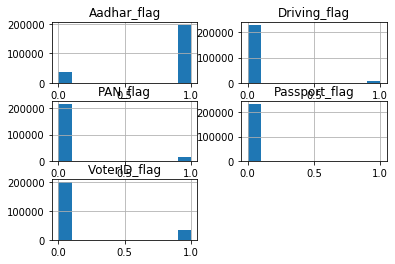

In [52]:
dataset[list].hist()
plt.show()

In [53]:
dataset['authenticate_cust'] = dataset['Aadhar_flag']+dataset['Driving_flag']+dataset['Passport_flag']+dataset['VoterID_flag']

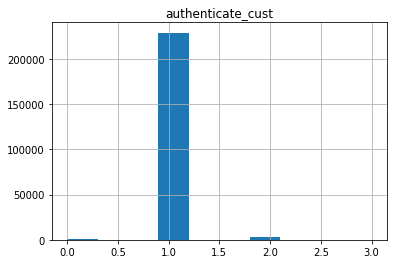

In [54]:
dataset[['authenticate_cust']].hist()
plt.show()

In [55]:
dataset['authenticate_cust'].value_counts()

1    228746
2      3418
0       973
3        17
Name: authenticate_cust, dtype: int64

<Figure size 3600x3600 with 0 Axes>

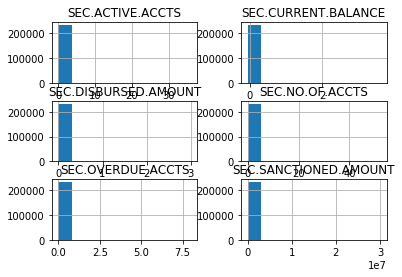

In [56]:
plt.figure(figsize=(50,50))
dataset[['SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT']].hist()
plt.show()

In [57]:
dataset.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age_of_cust,authenticate_cust
0,420825,50578,58400,89.55,2,678,2,1441,1984-01-01,2,2018-03-08,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34,1
1,537409,47145,65550,73.23,2,678,2,1502,1985-07-31,0,2018-09-26,6,1998,1,1,0,0,0,0,598,5,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,33,1
2,417566,53278,61360,89.63,2,678,2,1497,1985-08-24,0,2018-01-08,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33,1
3,624493,57513,66113,88.48,2,678,2,1501,1993-12-30,0,2018-10-26,6,1998,1,1,0,0,0,0,305,2,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,25,1
4,539055,52378,60300,88.39,2,678,2,1495,1977-09-12,0,2018-09-26,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,41,1


In [58]:
dataset.drop(['Date.of.Birth','MobileNo_Avl_Flag','Aadhar_flag','VoterID_flag','Driving_flag','Passport_flag','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','SEC.INSTAL.AMT'],axis=1,inplace=True)
#mobile no. : no variability
#Aadhar,Voter,Driving,Passport : combined to form authenticate_id
#all other are either highly correlated or highly skewed.

In [59]:
dataset.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,PAN_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age_of_cust,authenticate_cust
0,420825,50578,58400,89.55,2,678,2,1441,2,2018-03-08,6,1998,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34,1
1,537409,47145,65550,73.23,2,678,2,1502,0,2018-09-26,6,1998,0,598,5,1,1,1,27600,50200,50200,1991,0,1,1yrs 11mon,1yrs 11mon,0,1,33,1
2,417566,53278,61360,89.63,2,678,2,1497,0,2018-01-08,6,1998,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33,1
3,624493,57513,66113,88.48,2,678,2,1501,0,2018-10-26,6,1998,0,305,2,3,0,0,0,0,0,31,0,0,0yrs 8mon,1yrs 3mon,1,1,25,1
4,539055,52378,60300,88.39,2,678,2,1495,0,2018-09-26,6,1998,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,41,1


In [60]:
dataset.shape

(233154, 30)

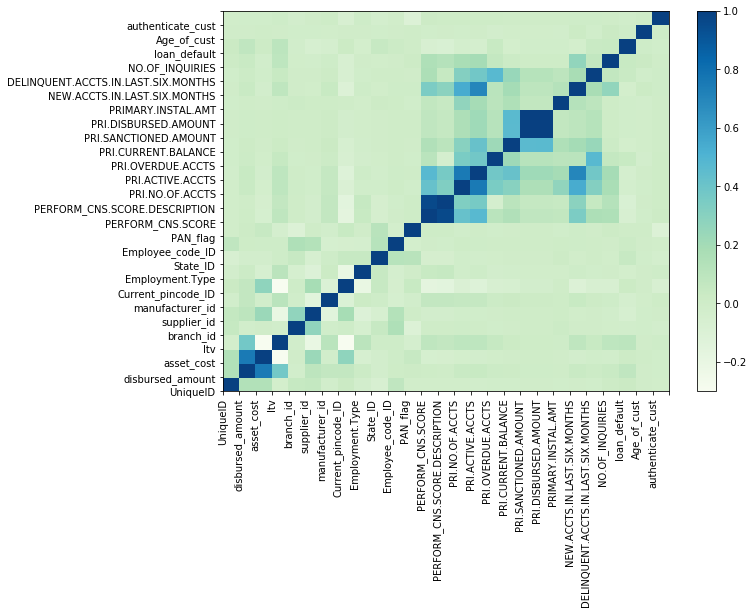

In [61]:
plt.figure(figsize = (10,7))
#colormap=plt.cm.coolwarm
plt.pcolor(dataset.corr(), cmap='GnBu')

#label names
row_labels = dataset.corr().columns.to_list()
col_labels = dataset.corr().index.to_list()

#move ticks and labels to the center
plt.xticks(np.arange(dataset.corr().shape[1] + 0.5),row_labels,rotation=90)
plt.yticks(np.arange(dataset.corr().shape[0] + 0.5),col_labels)

plt.colorbar()
plt.show()

In [62]:
dataset.drop(['asset_cost','PERFORM_CNS.SCORE.DESCRIPTION','PRI.DISBURSED.AMOUNT'],axis=1,inplace=True)   #highly correlated

In [63]:
dataset.shape

(233154, 27)

In [64]:
dataset.head()

,UniqueID,disbursed_amount,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,PAN_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age_of_cust,authenticate_cust
0,420825,50578,89.55,2,678,2,1441,2,2018-03-08,6,1998,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34,1
1,537409,47145,73.23,2,678,2,1502,0,2018-09-26,6,1998,0,598,1,1,1,27600,50200,1991,0,1,1yrs 11mon,1yrs 11mon,0,1,33,1
2,417566,53278,89.63,2,678,2,1497,0,2018-01-08,6,1998,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33,1
3,624493,57513,88.48,2,678,2,1501,0,2018-10-26,6,1998,0,305,3,0,0,0,0,31,0,0,0yrs 8mon,1yrs 3mon,1,1,25,1
4,539055,52378,88.39,2,678,2,1495,0,2018-09-26,6,1998,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,41,1


In [65]:
import re
dataset['CREDIT.HISTORY.LENGTH'] = dataset['CREDIT.HISTORY.LENGTH'].apply(lambda x: (re.sub('[a-z]','',x)).split())
dataset['CREDIT.HISTORY.LENGTH']= dataset['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x[0])*12+int(x[1]))

In [66]:
dataset['AVERAGE.ACCT.AGE'] = dataset['AVERAGE.ACCT.AGE'].apply(lambda x: (re.sub('[a-z]','',x)).split())
dataset['AVERAGE.ACCT.AGE']= dataset['AVERAGE.ACCT.AGE'].apply(lambda x: int(x[0])*12+int(x[1]))

In [67]:
dataset['Disbursal_month']=dataset['DisbursalDate'].apply(lambda x : x.month)

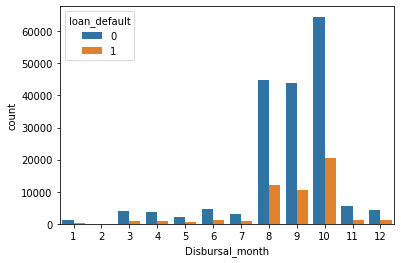

In [68]:
sns.countplot(dataset['Disbursal_month'],hue=dataset['loan_default'])  #maximum loans in october

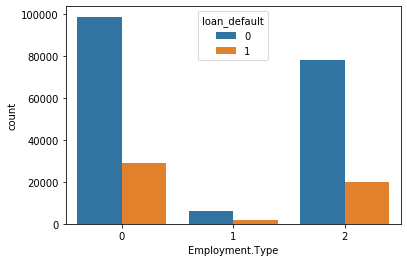

In [69]:
sns.countplot(dataset['Employment.Type'],hue=dataset['loan_default']) #maximum loans to self employed

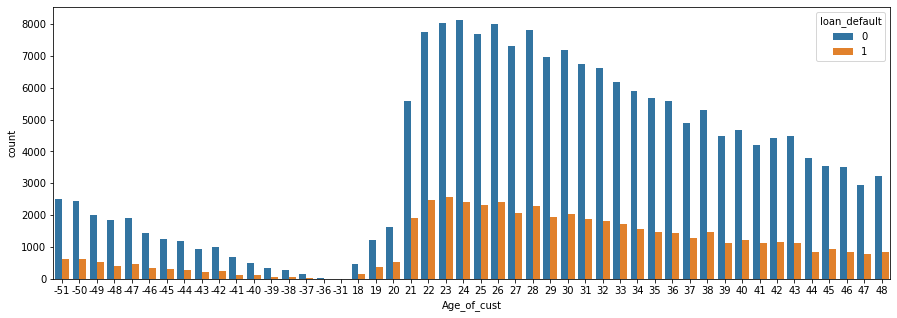

In [70]:
plt.figure(figsize=(15,5))
sns.countplot(dataset['Age_of_cust'],hue=dataset['loan_default']) #maximum loans and default by 21-30 years customer

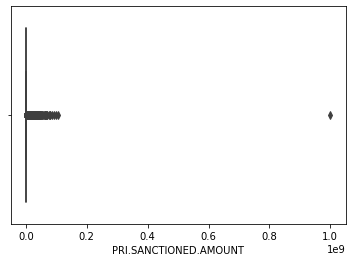

In [71]:
sns.boxplot(dataset['PRI.SANCTIONED.AMOUNT'])                 #outliers available

In [72]:
list3 = ['disbursed_amount', 'ltv', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRIMARY.INSTAL.AMT']
dataset[list3].describe()

,disbursed_amount,ltv,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRIMARY.INSTAL.AMT
count,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05
mean,54356.993528,74.746530,1.659001e+05,2.185039e+05,1.310548e+04
std,12971.314171,11.456636,9.422736e+05,2.374794e+06,1.513679e+05
min,13320.000000,10.030000,-6.678296e+06,0.000000e+00,0.000000e+00
25%,47145.000000,68.880000,0.000000e+00,0.000000e+00,0.000000e+00
50%,53803.000000,76.800000,0.000000e+00,0.000000e+00,0.000000e+00
75%,60413.000000,83.670000,3.500650e+04,6.250000e+04,1.999000e+03
max,990572.000000,95.000000,9.652492e+07,1.000000e+09,2.564281e+07


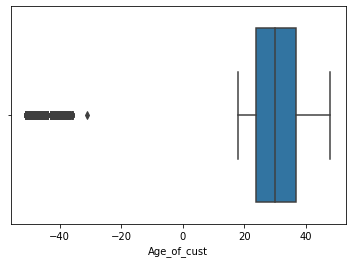

In [73]:
sns.boxplot(dataset['Age_of_cust'])

In [74]:
dataset.drop(['DisbursalDate'],axis=1,inplace=True)

In [75]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

UniqueID                               118253.50
disbursed_amount                        13268.00
ltv                                        14.79
branch_id                                  26.00
supplier_id                               740.00
manufacturer_id                             5.00
Current_pincode_ID                       4166.00
Employment.Type                             2.00
State_ID                                    6.00
Employee_code_ID                         1649.00
PAN_flag                                    0.00
PERFORM_CNS.SCORE                         678.00
PRI.NO.OF.ACCTS                             3.00
PRI.ACTIVE.ACCTS                            1.00
PRI.OVERDUE.ACCTS                           0.00
PRI.CURRENT.BALANCE                     35006.50
PRI.SANCTIONED.AMOUNT                   62500.00
PRIMARY.INSTAL.AMT                       1999.00
NEW.ACCTS.IN.LAST.SIX.MONTHS                0.00
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS         0.00
AVERAGE.ACCT.AGE    

In [76]:
dataset['loan_default'].value_counts()          #imbalanced data

0    182543
1     50611
Name: loan_default, dtype: int64

In [77]:
dataset.set_index('UniqueID',inplace=True,drop=True)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(dataset.drop(['loan_default'],axis=1))

StandardScaler()

In [79]:
sc_data = sc.transform(dataset.drop(['loan_default'],axis=1))

In [80]:
dataset.head()

,disbursed_amount,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,PAN_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age_of_cust,authenticate_cust,Disbursal_month
UniqueID,,,,,,,,,,,,,,,,,,,,,,,,,,
420825,50578,89.55,2,678,2,1441,2,6,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,1,3
537409,47145,73.23,2,678,2,1502,0,6,1998,0,598,1,1,1,27600,50200,1991,0,1,23,23,0,1,33,1,9
417566,53278,89.63,2,678,2,1497,0,6,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,1,1
624493,57513,88.48,2,678,2,1501,0,6,1998,0,305,3,0,0,0,0,31,0,0,8,15,1,1,25,1,10
539055,52378,88.39,2,678,2,1495,0,6,1998,0,0,0,0,0,0,0,0,0,0,0,0,1,1,41,1,9


In [81]:
dataset.columns

Index(['disbursed_amount', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Employment.Type', 'State_ID',
       'Employee_code_ID', 'PAN_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Age_of_cust', 'authenticate_cust', 'Disbursal_month'],
      dtype='object')

In [82]:
sc_columns =['disbursed_amount','ltv', 'branch_id', 'supplier_id', 'manufacturer_id',
       'Current_pincode_ID', 'Employment.Type', 'State_ID', 'Employee_code_ID',
        'PAN_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
        'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRIMARY.INSTAL.AMT',
        'NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
        'AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES','Age_of_cust', 'authenticate_cust', 
        'Disbursal_month']

In [83]:
dataset1=pd.DataFrame(sc_data , columns=sc_columns,index=dataset.index)
dataset1.reset_index(inplace=True)

In [84]:
x = dataset1
y = dataset['loan_default']

In [85]:
x.head()

,UniqueID,disbursed_amount,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,PAN_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age_of_cust,authenticate_cust,Disbursal_month
0,420825,-0.291335,1.292133,-1.046517,0.205698,-1.239668,-0.873885,1.156504,-0.281611,0.459901,-0.285929,-0.855453,-0.467804,-0.535617,-0.285264,-0.176064,-0.092010,-0.086581,-0.399782,-0.253566,-0.590198,-0.568640,-0.292450,0.397074,-0.077112,-3.258261
1,537409,-0.555997,-0.132372,-1.046517,0.205698,-1.239668,-0.846631,-0.894555,-0.281611,0.459901,-0.285929,0.911822,-0.276131,-0.020549,1.536941,-0.146773,-0.070871,-0.073427,-0.399782,2.347632,0.932337,0.236085,-0.292450,0.356430,-0.077112,0.114617
2,417566,-0.083183,1.299116,-1.046517,0.205698,-1.239668,-0.848865,-0.894555,-0.281611,0.459901,-0.285929,-0.855453,-0.467804,-0.535617,-0.285264,-0.176064,-0.092010,-0.086581,-0.399782,-0.253566,-0.590198,-0.568640,-0.292450,0.356430,-0.077112,-4.382554
3,624493,0.243307,1.198738,-1.046517,0.205698,-1.239668,-0.847077,-0.894555,-0.281611,0.459901,-0.285929,0.045917,0.107215,-0.535617,-0.285264,-0.176064,-0.092010,-0.086376,-0.399782,-0.253566,-0.060621,-0.043819,1.122986,0.031270,-0.077112,0.676763
4,539055,-0.152567,1.190882,-1.046517,0.205698,-1.239668,-0.849758,-0.894555,-0.281611,0.459901,-0.285929,-0.855453,-0.467804,-0.535617,-0.285264,-0.176064,-0.092010,-0.086581,-0.399782,-0.253566,-0.590198,-0.568640,1.122986,0.681589,-0.077112,0.114617


In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=24,test_size=0.3)

In [87]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(163207, 26) (163207,) (69947, 26) (69947,)


In [88]:
x_train.head()

,UniqueID,disbursed_amount,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,PAN_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age_of_cust,authenticate_cust,Disbursal_month
211964,481870,-1.075221,1.306099,0.696388,1.466886,-1.239668,-1.381449,1.156504,0.833908,1.499625,3.497370,-0.805212,-0.276131,-0.020549,-0.285264,-0.169212,-0.085483,-0.078045,0.647224,-0.253566,-0.457804,-0.498664,-0.29245,0.112560,-0.077112,-0.447530
149491,459107,-1.686262,-1.398016,-0.719722,0.292676,-1.239668,-1.059754,1.156504,-0.281611,0.437343,-0.285929,0.031140,0.873907,2.039722,3.359146,0.892669,0.570328,-0.082253,-0.399782,-0.253566,2.123886,2.895176,-0.29245,0.762879,-0.077112,-0.447530
168970,433745,0.340907,1.217940,-0.066133,-0.687504,0.880005,0.011223,-0.894555,0.387700,0.705990,-0.285929,-0.855453,-0.467804,-0.535617,-0.285264,-0.176064,-0.092010,-0.086581,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,0.031270,-0.077112,1.238909
206621,531416,-0.845174,-1.637180,-0.338462,1.537138,0.880005,-0.913204,1.156504,-0.281611,1.455534,-0.285929,-0.855453,-0.467804,-0.535617,-0.285264,-0.176064,-0.092010,-0.086581,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.131309,-0.077112,0.114617
150565,419454,3.286722,-0.715441,-0.665256,0.749313,0.032136,1.545978,-0.894555,1.280115,0.508093,3.497370,-0.855453,-0.467804,-0.535617,-0.285264,-0.176064,-0.092010,-0.086581,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.050019,-0.077112,-3.258261


Text(0, 0.5, 'F2')

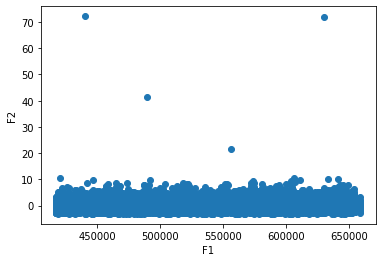

In [89]:
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from pyod.utils.data import get_outliers_inliers

x_outliers,x_inliers=get_outliers_inliers(np.array(x_train[['UniqueID','disbursed_amount','ltv','PERFORM_CNS.SCORE','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRIMARY.INSTAL.AMT']]),y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

# #separate the two features and use it to plot the data 
F1 = (np.array(x_train[x_train.columns[0]])).reshape(-1,1)
F2 = (np.array(x_train[x_train.columns[1]])).reshape(-1,1)

# # create a meshgrid 
xx , yy = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))

# # scatter plot 
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2')

In [90]:
#np.array(x_train[x_train.columns[0]])
x_inliers.shape

(127805, 7)

In [91]:
columns=['UniqueID','disbursed_amount','ltv','PERFORM_CNS.SCORE', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRIMARY.INSTAL.AMT']


In [92]:
dataset1=pd.DataFrame(x_inliers,columns=columns)

In [93]:
dataset1.head()

,UniqueID,disbursed_amount,ltv,PERFORM_CNS.SCORE,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRIMARY.INSTAL.AMT
0,481870.0,-1.075221,1.306099,-0.805212,-0.169212,-0.085483,-0.078045
1,531416.0,-0.845174,-1.637180,-0.855453,-0.176064,-0.092010,-0.086581
2,561735.0,-0.845174,-0.114914,-0.855453,-0.176064,-0.092010,-0.086581
3,531096.0,-0.042709,0.635744,1.431957,-0.136265,0.153249,-0.086581
4,649747.0,0.746187,1.277295,-0.855453,-0.176064,-0.092010,-0.086581


In [94]:
dataset1['UniqueID']=dataset1['UniqueID'].astype('int')
dataset1.head()

,UniqueID,disbursed_amount,ltv,PERFORM_CNS.SCORE,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRIMARY.INSTAL.AMT
0,481870,-1.075221,1.306099,-0.805212,-0.169212,-0.085483,-0.078045
1,531416,-0.845174,-1.637180,-0.855453,-0.176064,-0.092010,-0.086581
2,561735,-0.845174,-0.114914,-0.855453,-0.176064,-0.092010,-0.086581
3,531096,-0.042709,0.635744,1.431957,-0.136265,0.153249,-0.086581
4,649747,0.746187,1.277295,-0.855453,-0.176064,-0.092010,-0.086581


In [95]:
dataset_final = dataset1.merge(pd.DataFrame(y_train).reset_index(),how='inner',on='UniqueID')

In [96]:
dataset_final['loan_default'].value_counts()    #should not remove outliers as they leads us to all defaulters?

0    127805
Name: loan_default, dtype: int64

In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [98]:
sum(y_train_res==1),sum(y_train_res==0)            #data is balanced

(127805, 127805)

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=1)

In [100]:
from sklearn.metrics import classification_report
pred_kn=knn.predict(x_test)
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67     54738
           1       0.23      0.44      0.30     15209

    accuracy                           0.55     69947
   macro avg       0.51      0.51      0.48     69947
weighted avg       0.67      0.55      0.59     69947



In [101]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_kn))

[[31684 23054]
 [ 8474  6735]]


In [102]:
knn.score(x_train,y_train)

1.0

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [104]:
lg = LogisticRegression()
dc = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [105]:
lg.fit(x_train_res, y_train_res)
dc.fit(x_train_res, y_train_res)
rf.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [106]:
pred_lg=lg.predict(x_test)
pred_dc=dc.predict(x_test)
pred_rf=rf.predict(x_test)

In [107]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,pred_lg))
print(roc_auc_score(y_test,pred_dc))
print(roc_auc_score(y_test,pred_rf))

0.5
0.5322369169123087
0.5233851621491522


In [108]:
print(classification_report(y_test,pred_lg,zero_division = 1))
print(classification_report(y_test,pred_dc))
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     54738
           1       0.22      1.00      0.36     15209

    accuracy                           0.22     69947
   macro avg       0.61      0.50      0.18     69947
weighted avg       0.83      0.22      0.08     69947

              precision    recall  f1-score   support

           0       0.80      0.77      0.78     54738
           1       0.26      0.29      0.28     15209

    accuracy                           0.67     69947
   macro avg       0.53      0.53      0.53     69947
weighted avg       0.68      0.67      0.67     69947

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     54738
           1       0.42      0.08      0.13     15209

    accuracy                           0.78     69947
   macro avg       0.61      0.52      0.50     69947
weighted avg       0.71      0.78      0.71     69947



In [109]:
print(lg.score(x_train_res, y_train_res))
print(dc.score(x_train_res, y_train_res))
print(rf.score(x_train_res, y_train_res))

0.5
1.0
0.9999960877899926


In [110]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred_lg))
print(accuracy_score(y_test, pred_dc))
print(accuracy_score(y_test, pred_rf))

0.21743605873018143
0.6669621284686977
0.7765450984316697


# Best accuracy score is of Random Forest Classifier

In [111]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [112]:
feature_importances

,importance
Employment.Type,0.086441
manufacturer_id,0.082887
Current_pincode_ID,0.070869
State_ID,0.064024
PERFORM_CNS.SCORE,0.061865
ltv,0.060449
disbursed_amount,0.057680
UniqueID,0.054605
Age_of_cust,0.048050
supplier_id,0.046203


# Conclusion
1. maximum loans provided in october
2. maximum loans are provided to self employed and loans to default ratio is also maximum for self employed
3. maximum loans default by 21-30 years of customer
4. Information about secondary loans is not provided accurately by most of the customer